In [1]:
import os

try:
  from google.colab import drive
  drive.mount('/content/drive')

  os.chdir('/content/drive/MyDrive/GitHub/kornia')
except Exception:   # Not run on Google Colab
  import getpass
  if getpass.getuser() == 'vscode':       # Running in container
    os.chdir('/workspaces/kornia/')
  else:                                   # Running in virtual environment
    os.chdir(os.path.join(os.path.expanduser('~'), 'Documents/Git/kornia/'))

  print(os.getcwd())
  import sys
  sys.path.insert(0, os.getcwd())

/home/yhollander/Documents/Git/kornia


In [2]:
import torch
from kornia.nerf.rays import sorted_piecewise_constant_pdf
import matplotlib.pyplot as plt

In [10]:
num_points = 11
batch_size = 1
num_points_out = 20000
t_vals_uniform = torch.linspace(0.0, 1.0, num_points).expand(batch_size, -1)
weights = torch.zeros(batch_size, num_points - 1)
weights[0, 0] = 0.3
weights[0, 1] = 0.2
weights[0, 5] = 0.25
weights[0, 9] = 0.25

x_sampled = sorted_piecewise_constant_pdf(t_vals_uniform, weights, num_points_out)


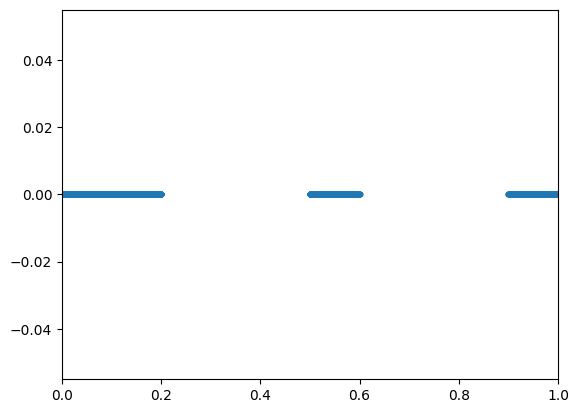

In [11]:
fig = plt.figure()
y = torch.zeros_like(x_sampled)
plt.plot(x_sampled[0].numpy(), y[0].numpy(), '.')
plt.xlim(0., 1.)

plt.show()

In [12]:
hist = torch.histogram(x_sampled[0], num_points - 1)

<BarContainer object of 10 artists>

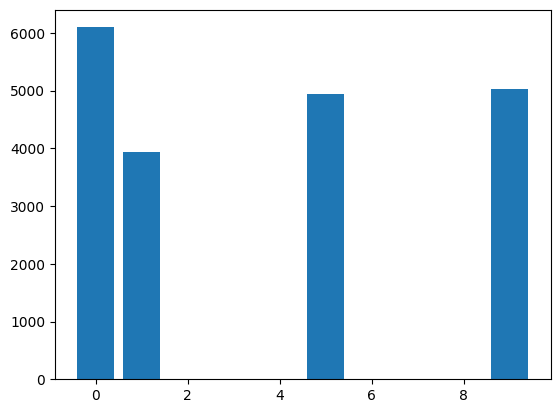

In [13]:
fig = plt.figure()
plt.bar(torch.arange(num_points - 1), hist[0])

In [17]:
hist[0] / num_points_out

tensor([3.0480e-01, 1.9705e-01, 0.0000e+00, 0.0000e+00, 5.0000e-05, 2.4660e-01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5150e-01])

In [18]:
t_vals_uniform[0, :-1]

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000])

In [19]:
torch.arange(2)

tensor([0, 1])